In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import os

from PIL import Image
from keras.datasets import mnist
from IPython.display import Image as IPImage

from neuralnetlib.preprocessing import one_hot_encode
from neuralnetlib.models import Sequential, GAN
from neuralnetlib.layers import Input, Dense

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
n_classes = np.unique(y_train).shape[0]

# Flatten images
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# Normalize pixel values
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Labels to categorical
y_train = one_hot_encode(y_train, n_classes)
y_test = one_hot_encode(y_test, n_classes)

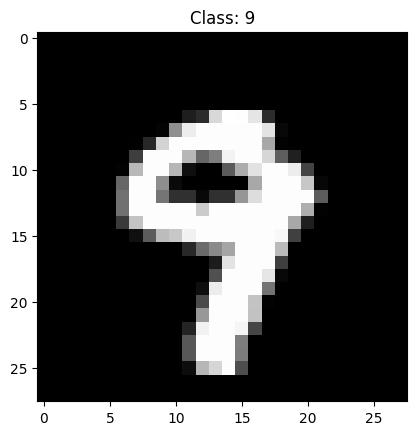

In [3]:
i = random.randint(0,len(x_train) - 1)
plt.imshow(x_train[i].reshape(28,28), cmap='gray')
plt.title('Class: ' + str(np.argmax(y_train[i])))
plt.show()

In [4]:
noise_dim = 32

generator = Sequential()
generator.add(Input(noise_dim + n_classes))  # Input total: 32 + 10 = 42
generator.add(Dense(128, input_dim=noise_dim + n_classes, activation='leakyrelu'))
generator.add(Dense(784, activation='sigmoid'))

In [5]:
discriminator = Sequential()
discriminator.add(Input(784 + n_classes))  # Input total: 784 + 10 = 794
discriminator.add(Dense(128, input_dim=784 + n_classes, activation='leakyrelu'))
discriminator.add(Dense(1, activation='sigmoid'))

In [6]:
gan = GAN(latent_dim=noise_dim, n_classes=n_classes)

gan.compile(
    generator,
    discriminator,
    generator_optimizer='adam',
    discriminator_optimizer='adam',
    loss_function='bce',
    verbose=True
)

Inferred image dimensions: 28x28
GAN(latent_dim=32, gradient_clip_threshold=0.1, enable_padding=False, padding_size=32, random_state=1733776797745195100)
-------------------------------------------------
Generator:
Sequential(gradient_clip_threshold=5.0, enable_padding=False, padding_size=32, random_state=1733776797714640900)
-------------------------------------------------
Layer 1: Input(input_shape=(42,))
Layer 2: Dense(units=128)
Layer 3: Activation(LeakyReLU)
Layer 4: Dense(units=784)
Layer 5: Activation(Sigmoid)
-------------------------------------------------
Loss function: BinaryCrossentropy
Optimizer: Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, clip_norm=None, clip_value=None)
-------------------------------------------------
-------------------------------------------------
Discriminator:
Sequential(gradient_clip_threshold=5.0, enable_padding=False, padding_size=32, random_state=1733776797729160200)
-------------------------------------------------
Lay

In [ ]:
history = gan.fit(x_train,
                  y_train,
                 epochs=40,
                 batch_size=128,
                 plot_generated=True,
                 )   

[==============================] 100% Epoch 1/40 - d_loss: 0.3271 - g_loss: 2.3348 -  - 21.86s
[==============================] 100% Epoch 2/40 - d_loss: 0.3257 - g_loss: 2.3052 -  - 20.65s
[==============================] 100% Epoch 3/40 - d_loss: 0.3262 - g_loss: 2.2997 -  - 23.30s
[==============================] 100% Epoch 4/40 - d_loss: 0.3278 - g_loss: 2.2744 -  - 25.62s
[==============================] 100% Epoch 5/40 - d_loss: 0.3272 - g_loss: 2.2733 -  - 25.81s
[==============================] 100% Epoch 6/40 - d_loss: 0.3270 - g_loss: 2.2747 -  - 26.11s
[==============================] 100% Epoch 7/40 - d_loss: 0.3273 - g_loss: 2.2662 -  - 26.35s
[==============================] 100% Epoch 8/40 - d_loss: 0.3280 - g_loss: 2.2516 -  - 26.68s
[==============================] 100% Epoch 9/40 - d_loss: 0.3287 - g_loss: 2.2300 -  - 25.85s
[==============================] 100% Epoch 10/40 - d_loss: 0.3291 - g_loss: 2.2142 -  - 21.91s
[==============================] 100% Epoch 11/40

In [8]:
image_files = [f for f in os.listdir() if f.endswith('.png') and f.startswith('video')]
image_files.sort(key=lambda x: int(x.replace('video', '').replace('.png', '')))

images = [Image.open(img) for img in image_files]

if images:
    images[0].save('output_3.gif', save_all=True, append_images=images[1:], duration=100, loop=0)

print("GIF 'output.gif' succesffuly created!")

GIF 'output.gif' succesffuly created!


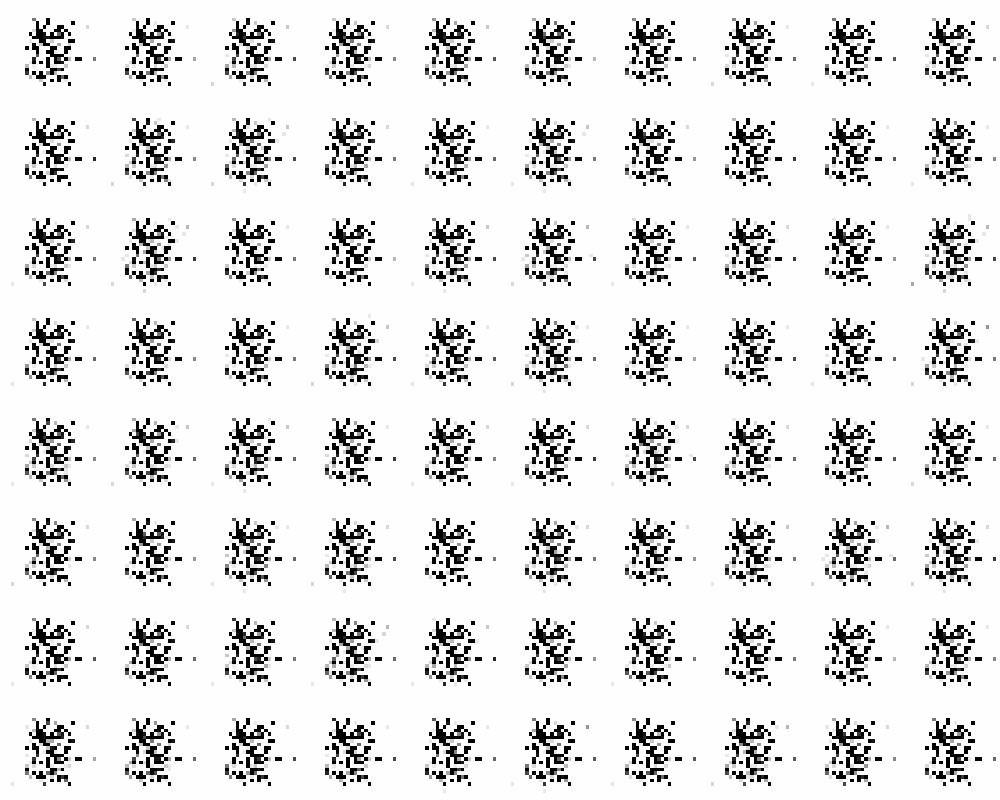

In [9]:
IPImage(filename="output_3.gif")

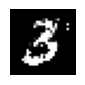

In [ ]:
labels = np.array([3] * 10)  # we will generate a 3
samples = gan.predict(n_samples=10, labels=labels)

plt.figure(figsize=(10, 10))
plt.subplot(1, 10, i+1)
plt.imshow(samples[0].reshape(28, 28), cmap='gray')
plt.axis('off')
plt.show()